In [207]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
import sys
sys.path.append('/Users/gsinyakov/ts_course_summer/')

In [209]:
import random
import numpy as np
import pandas as pd

In [210]:
import plotting
from load_dataset import Dataset

## Разбор

### Выгрузим многомерный ряд

In [211]:
ts = pd.read_csv('../data/stability_index.csv', index_col='timestamp', parse_dates=True)

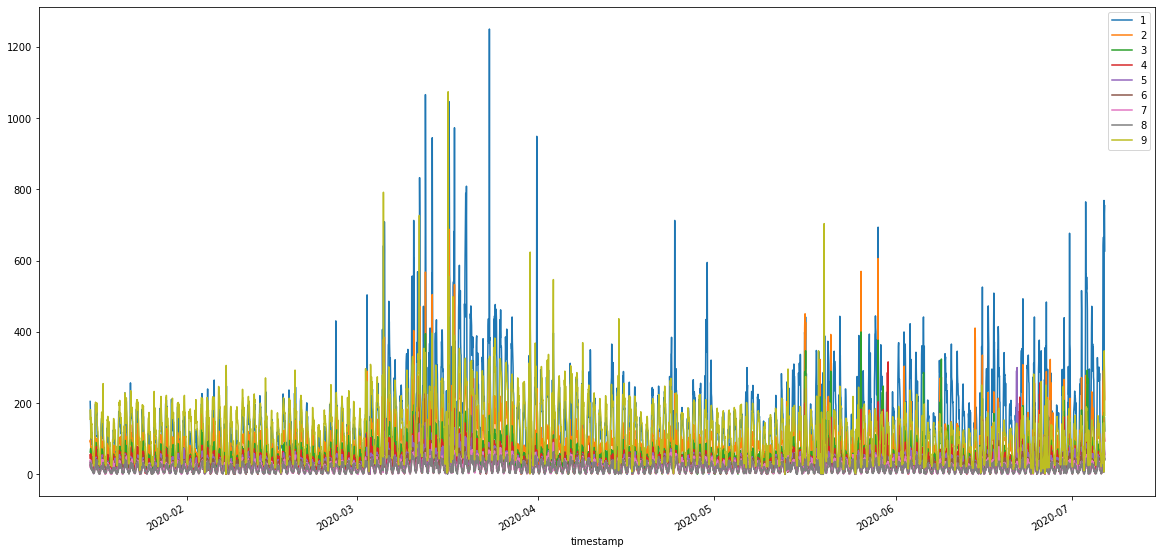

In [212]:
ts.plot(figsize=(20, 10))

### Приведем все значения к относительному виду

In [213]:
from stability_index import to_relative

In [214]:
norm_ts = to_relative(ts)

In [215]:
norm_ts.head()

1         2         3         4         5  \
timestamp                                                               
2020-01-15 13:00:00  0.302806  0.135894  0.093058  0.081241  0.038405   
2020-01-15 14:00:00  0.252555  0.141606  0.100730  0.064234  0.045255   
2020-01-15 15:00:00  0.226209  0.129485  0.113885  0.090484  0.062402   
2020-01-15 16:00:00  0.193103  0.137931  0.121839  0.089655  0.073563   
2020-01-15 17:00:00  0.208929  0.137500  0.071429  0.094643  0.058929   

                            6         7         8         9  
timestamp                                                    
2020-01-15 13:00:00  0.039882  0.029542  0.050222  0.228951  
2020-01-15 14:00:00  0.032117  0.059854  0.037956  0.265693  
2020-01-15 15:00:00  0.039002  0.048362  0.029641  0.260530  
2020-01-15 16:00:00  0.071264  0.043678  0.034483  0.234483  
2020-01-15 17:00:00  0.051786  0.037500  0.053571  0.285714

### Посчитаем дневной и часовой stability index для последней точки

![img](../data/images/si.png)

In [216]:
from stability_index import calculate_ts_stability_index

In [217]:
calculate_ts_stability_index(
    norm_ts[:-1], norm_ts.iloc[[-1]],
    reference_type='day',
    granularity='PT1H',
    fill_val=0.5
)

0.04719051696106927

In [218]:
calculate_ts_stability_index(
    norm_ts[:-1], norm_ts.iloc[[-1]],
    reference_type='instant',
    granularity='PT1H',
    fill_val=0.5
)

0.010093424689737085

### Посчтитаем stability index для всех точек временного ряда

In [219]:
from stability_index import calculate_ts_stability_index_batch

In [220]:
si_day = calculate_ts_stability_index_batch(norm_ts)

In [221]:
si_day.tail()

2020-07-06 12:00:00    0.538301
2020-07-06 13:00:00    0.278769
2020-07-06 14:00:00    0.020073
2020-07-06 15:00:00    0.041673
2020-07-06 16:00:00    0.047191
dtype: float64

In [222]:
si_hour = calculate_ts_stability_index_batch(norm_ts, reference_type='instant')

In [223]:
si_hour.tail()

2020-07-06 12:00:00    0.190018
2020-07-06 13:00:00    0.110627
2020-07-06 14:00:00    0.202086
2020-07-06 15:00:00    0.035574
2020-07-06 16:00:00    0.010093
dtype: float64

In [224]:
plotting.plot_multiple_ts(si_day, si_hour)

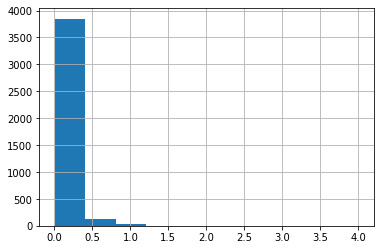

In [225]:
si_day.hist()

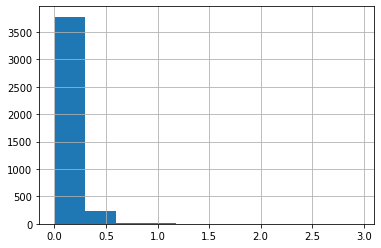

In [226]:
si_hour.hist()

### Введем порог 0.05

In [233]:
T = 0.5

In [234]:
day_anoms = si_day[si_day > T]

In [235]:
day_anoms.head(3)

2020-01-24 00:00:00    0.557815
2020-02-21 02:00:00    0.546983
2020-02-26 04:00:00    0.569483
dtype: float64

In [236]:
hour_anoms = si_hour[si_hour > T]

In [237]:
hour_anoms.head(3)

2020-02-06 05:00:00    0.575016
2020-02-18 03:00:00    0.534437
2020-02-21 03:00:00    0.800673
dtype: float64

In [238]:
plotting.plot_multiple_ts(si_day, si_hour, pd.Series([T]*len(si_day), index=si_day.index))

## Практика

#### 1. Реализуйте функцию to_relative, возвращающую относительные значения ряда для каждой точки y_i(t) / sum(y(t))

In [145]:
def to_relative(multi_ts: pd.DataFrame):
    """
    Transforms multi-dimensional time series into relative values
    """
    # ваш код здесь

#### 2. Реализуйте расчет stability index для двух распределений

In [146]:
def calculate_si(real: np.array, reference: np.array):
    """
    Calculates population stability index using following formula
    SI = Σ (pA i - pB i ) * ( ln(pA i ) - ln(pB i ) )

    Parameters
    ----------
    real : 1d np.array
        Distribution for
    reference : 1d np.array
        Reference distribution.
    fill_val : float
        Value to replace NANs with

    Returns
    -------
    stability_index : float
    """

    # ваш код здесь

#### 3. Реализуйте функцию calculate_ts_stability_index для одной точки временного ряда

In [ ]:
def calculate_ts_stability_index(
        ts, incoming_point, reference_type='day', granularity='PT1H', fill_val=0.5):
    """
    Calculates population stability index for n-dimensional time-series.

    Parameters
    ----------
    ts : pd.Dataframe (n_samples, n_dim) with datetime index
        N-dimensional time-series with granularity of the following format "dd:hh:mm"
    incoming_point : pd.Dataframe of shape (1, n_dim_new) with datetime index
        New point, for which to make decision about stability. N_dim_new doesn't have
        to be equal to n_dim. In case when it's either less or higher all missing
        previous points for that dimension are filled with fill_val (usually quasi-null) value.
    reference_type : {'instant', 'day', 'week'}
        Point which distribution gets compared to the incoming point.
        'instant' stand for previous point, 'day' for point 24 hours ago and
        'week' stands for 24*7 hours ago.
    granularity: str
        Frequency of time-series of the following format "dd::hh::mm"
    fill_val : float
        Value to fillna

    Returns
    -------
    si : float
        Stability index for incoming point calculated relative to reference point.
    """
    
    # ваш код здесь

#### 4. Реализуйте функцию, проходящую по всем точкам ряда и считающую для каждой точки stability_index

In [147]:
def calculate_ts_stability_index_batch(ts, **kwargs):
    """Returns series with stability index calculated for every point of ts, where possible"""
    # ваш код здесь